In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14


### Some test functions



In [2]:
f1 = lambda x: 10*np.exp(-50*abs(x)) - 0.01/((x-0.5)**2. + 0.001) + 5*np.sin(5*x)
I1 = -0.56681975015


f2 = lambda x: 1/(1+x**2)
I2 = 2*np.arctan(5)


f3 = lambda x: np.sqrt(1-0.36*np.sin(x)**2.)/(2*np.pi)
I3 = 0.90277992777219

### Newton Cotes and Clenshaw Curtis

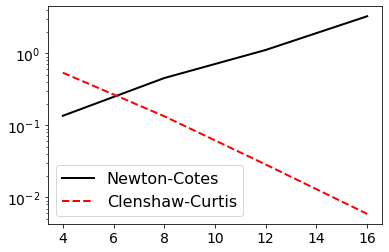

In [3]:
from scipy.integrate import newton_cotes
from quadpy.c1 import clenshaw_curtis, newton_cotes_closed #Install using !pip install quadpy

a = -5; b = 5

err_nc = []
err_cc = []
nlst = range(4,20,4)
for n in nlst:
    h = (b-a)/n
    
    
    #Newton-Cotes
    scheme = newton_cotes_closed(n)
    val = scheme.integrate(f2, [a, b])
    err_nc.append(abs(val-I2)/abs(I2))
    
    #Clenshaw-Curtis
    scheme = clenshaw_curtis(n)
    val = scheme.integrate(f2, [a, b])
    err_cc.append(abs(val-I2)/abs(I2))

        
plt.semilogy(nlst, err_nc, 'k-', nlst, err_cc, 'r--', lw = 2)
plt.legend(('Newton-Cotes', 'Clenshaw-Curtis'), fontsize = 16)

[ 0.0536683   0.35507188 -0.16208714  0.90989258 -0.87031025  1.42752926
 -0.87031025  0.90989258 -0.16208714  0.35507188  0.0536683 ]


Text(0.5, 1.0, 'Newton Cotes points')

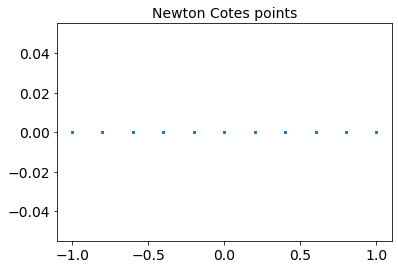

In [4]:
n = 10
scheme = newton_cotes_closed(n)
print(scheme.weights) 
plt.plot(scheme.points, 0*scheme.points, 's', markersize = 2)
plt.title('Newton Cotes points', fontsize = 14)

[0.01234568 0.11656746 0.22528432 0.30194004 0.34386251 0.34386251
 0.30194004 0.22528432 0.11656746 0.01234568]


Text(0.5, 1.0, 'Clenshaw-Curtis points')

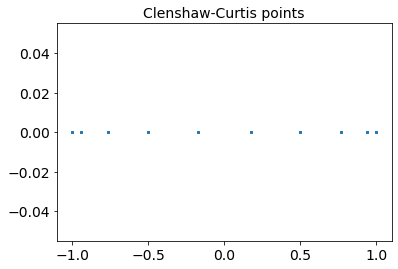

In [5]:
n = 10
scheme = clenshaw_curtis(n)
print(scheme.weights) 
plt.plot(scheme.points, 0*scheme.points, 's', markersize = 2)
plt.title('Clenshaw-Curtis points', fontsize = 14)

### Composite Trapezoidal and Simpsons rules

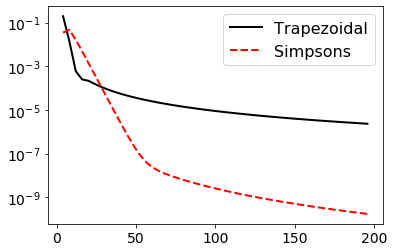

In [6]:
from scipy.integrate import trapz, simps
a = -5; b = 5

errt = []
errs = []
nlst = range(4,200,4)
for n in nlst:
    h = (b-a)/n
    xj = a + np.arange(n+1)*h
    
    #Trapezoidal rule
    val = trapz(f2(xj), xj, h)
    errt.append(abs(val-I2)/abs(I2))
    
    #Simpson's rule
    val = simps(f2(xj), xj, h)
    errs.append(abs(val-I2)/abs(I2))
        
plt.semilogy(nlst, errt, 'k-', nlst, errs, 'r--', lw = 2)
plt.legend(('Trapezoidal', 'Simpsons'), fontsize = 16)

### Periodic function

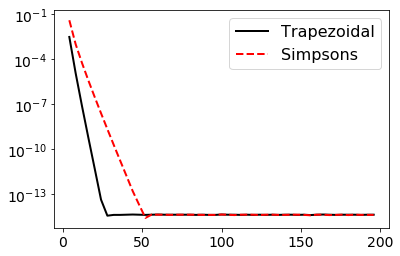

In [7]:
a = 0; b = 2*np.pi

errt = []
errs = []
nlst = range(4,200,4)
for n in nlst:
    h = (b-a)/n
    xj = a + np.arange(n+1)*h
    
    #Trapezoidal rule
    val = trapz(f3(xj), xj, h)
    errt.append(abs(val-I3)/abs(I3))
    
    #Simpson's rule
    val = simps(f3(xj), xj, h)
    errs.append(abs(val-I3)/abs(I3))
        
plt.semilogy(nlst, errt, 'k-', nlst, errs, 'r--', lw = 2)
plt.legend(('Trapezoidal', 'Simpsons'), fontsize = 16)

### Adaptive Quadrature

Approximate Integral -0.5668197486926385 
 Error estimate 0.0015527736666031827 
 True integral -0.56681975015


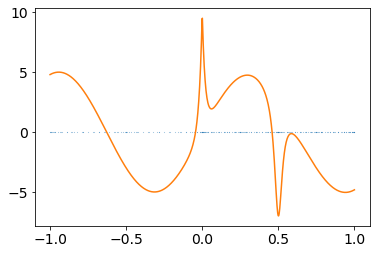

In [8]:
from scipy.integrate import quad 

class func:
    def __init__(self, f):
        self.xval = []
        self.f = f
    def __call__(self, x):
        self.xval.append(x)
        return self.f(x)
    
fad = func(f1)  
val, err = quad(fad, -1,1, epsrel = 1.e-2)
print('Approximate Integral', val, '\n Error estimate', err, '\n True integral', I1)
xp = np.linspace(-1,1,1000)
plt.plot(fad.xval, 0*np.array(fad.xval), 's', markersize = 0.1)
plt.plot(xp, fad(xp))

In [9]:
epslst = 10.**(-np.arange(1,10))
for eps in epslst:
    val, errest = quad(fad, -1,1, epsabs = eps)
    print('Value', val, 'Integral', I1,  'Error estimate', errest)

Value -0.5668201774837158 Integral -0.56681975015 Error estimate 0.09633072327507335
Value -0.5668197486926385 Integral -0.56681975015 Error estimate 0.0015527736666031827
Value -0.5668197494225146 Integral -0.56681975015 Error estimate 0.0006507263564921214
Value -0.5668197501523904 Integral -0.56681975015 Error estimate 3.563708110970081e-06
Value -0.5668197501523904 Integral -0.56681975015 Error estimate 3.563708110970081e-06
Value -0.5668197501529306 Integral -0.56681975015 Error estimate 1.2962750335886999e-11
Value -0.5668197501529306 Integral -0.56681975015 Error estimate 1.2962750335886999e-11
Value -0.5668197501529306 Integral -0.56681975015 Error estimate 1.2962750335886999e-11
Value -0.5668197501529306 Integral -0.56681975015 Error estimate 1.2962750335886999e-11
